In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner

In [4]:
param_names = ['kappa','mu','attenu']

name1 = '../output/210721-033422_M-I5-B1'
name2 = '../output/210721-033433_M-I5-C1'
name3 = '../output/210720-123459_M-I4-B1'

#parameter that excludes 0 in range
param_nonzero = 2
finish = True

In [5]:
file1 = h5py.File(name1+'.h5', 'r')
file2 = h5py.File(name2+'.h5', 'r')
file3 = h5py.File(name3+'.h5', 'r')

chain1 = np.array(file1.get('mcmc').get('chain'))
chain2 = np.array(file2.get('mcmc').get('chain'))
chain3 = np.array(file2.get('mcmc').get('chain'))

if not finish:
    nsteps1 = np.where(chain1[:,0,param_nonzero]==0)[0][0]
    nsteps2 = np.where(chain2[:,0,param_nonzero]==0)[0][0]
    nsteps3 = np.where(chain3[:,0,param_nonzero]==0)[0][0]

    chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
    chain2 = np.array(file2.get('mcmc').get('chain'))[:nsteps2]
    chain3 = np.array(file3.get('mcmc').get('chain'))[:nsteps3]
    
print('File 1 shape: ', chain1.shape)
print('File 2 shape: ', chain2.shape)
print('File 3 shape: ', chain3.shape)

prob1 = np.array(file1.get('mcmc').get('log_prob'))
prob2 = np.array(file2.get('mcmc').get('log_prob'))
prob3 = np.array(file3.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))
accepted2 = np.array(file2.get('mcmc').get('accepted'))
accepted2 = np.array(file3.get('mcmc').get('accepted'))

File 1 shape:  (5000, 16, 3)
File 2 shape:  (5000, 16, 3)
File 3 shape:  (5000, 16, 3)


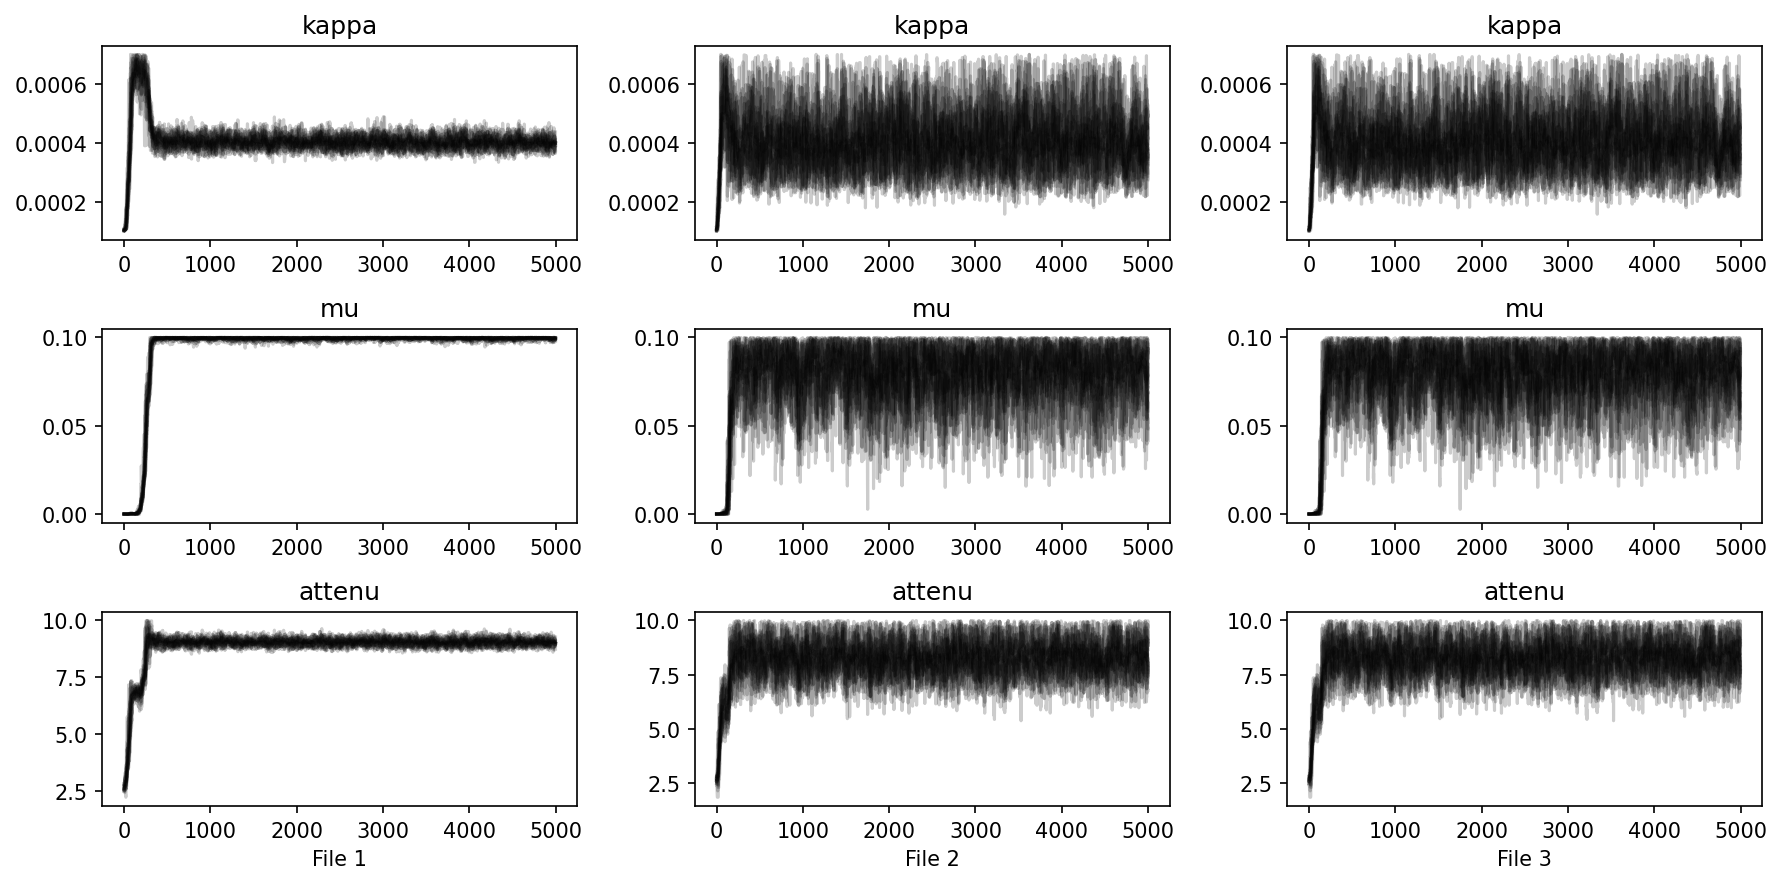

In [6]:
fig, ax = plt.subplots(len(param_names),3,figsize=(12,6),dpi=150)
for i in range(len(param_names)):
    ax[i,0].plot(chain1[:,:,i],c='k',alpha=0.2)
    ax[i,0].set(title=param_names[i])
    ax[i,1].plot(chain2[:,:,i],c='k',alpha=0.2)
    ax[i,1].set(title=param_names[i])
    ax[i,2].plot(chain3[:,:,i],c='k',alpha=0.2)
    ax[i,2].set(title=param_names[i])

for i in range(3):
    ax[-1,i].set(xlabel='File '+str(i+1))
    
fig.tight_layout()
plt.show()

### Choose burnin

In [7]:
burnin = 300

chain1_flat = chain1[burnin:,:,:].reshape((chain1.shape[0]-burnin)*chain1.shape[1],3)
chain2_flat = chain2[burnin:,:,:].reshape((chain2.shape[0]-burnin)*chain2.shape[1],3)
chain3_flat = chain3[burnin:,:,:].reshape((chain3.shape[0]-burnin)*chain3.shape[1],3)

### Corner plot file 1

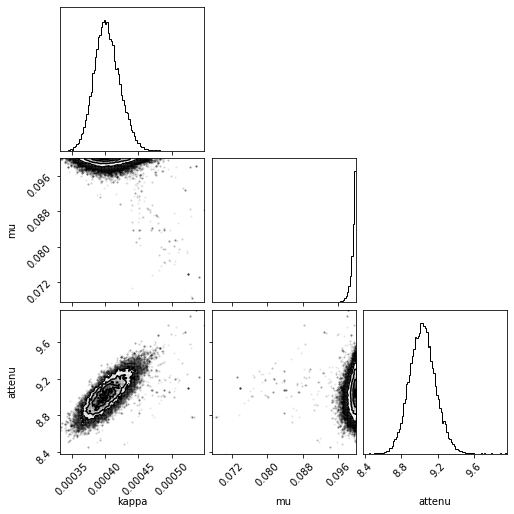

In [11]:
fig = corner.corner(
    chain1_flat, labels=param_names,bins=100)

### Corner plot file 2

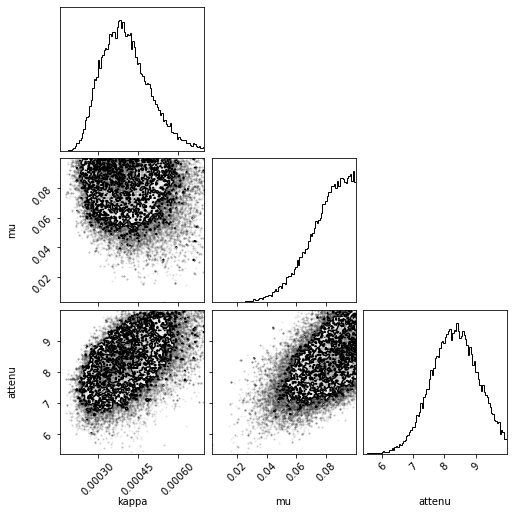

In [10]:
fig = corner.corner(
    chain2_flat, labels=param_names,bins=100)

### Corner plot file 3

In [ ]:
fig = corner.corner(
    chain3_flat, labels=param_names,bins=50)

## Log probability

In [ ]:
fig, ax = plt.subplots(2,3,dpi=150,figsize=(14,8))
ax[0,0].plot(prob1[:nsteps1],c='k',alpha=0.2)
ax[0,1].plot(prob2[:nsteps2],c='k',alpha=0.2)
ax[0,2].plot(prob3[:nsteps3],c='k',alpha=0.2)

ax[1,0].plot(np.exp(prob1[:nsteps1]),c='k',alpha=0.2)
ax[1,1].plot(np.exp(prob2[:nsteps2]),c='k',alpha=0.2)
ax[1,2].plot(np.exp(prob3[:nsteps3]),c='k',alpha=0.2)
plt.show()